In [ ]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

path_data = 'MyDrive/Colab Notebooks/data/DataMiningProject/Preprocessed/'
path_mount = '/content/drive/'

In [ ]:
from google.colab import drive
drive.mount(path_mount)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Paziente S2 - dati unbalanced (88% vs 12%)

## Definizione dei Dataset

In [ ]:
subject = "S2"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")
df.head()

,epoch,condition,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8
0,0,0,"[-0.1855758304, -0.2241071791, -0.226321089900...","[-0.583005342, -0.5674856422, -0.5448782188, -...","[1.3484414113, 1.4164026141, 1.3955864313, 1.3...","[-0.0419713478, -0.059699784900000004, -0.0149...","[0.0355617705, 0.0489167248, 0.0471898571, 0.0...","[-0.2970420733, -0.2560380583, -0.262114404, -...","[0.0225666194, 0.0142629656, -0.0153874406, -0...","[-0.2989752077, -0.3722516399, -0.3790755094, ..."
1,1,0,"[0.054785406, 0.0972470424, 0.1159649808, 0.11...","[-0.2946071226, -0.39581822, -0.49349363960000...","[-0.2477043683, -0.4051385179, -0.397656954400...","[0.36311215500000005, 0.4359860468, 0.42946984...","[0.3452818845, 0.304446217, 0.2408658347, 0.16...","[-0.2367872665, -0.1285892573, -0.0065062922, ...","[0.031019329800000002, 0.0349803369, 0.0165115...","[-0.0151000179, 0.0568863519, 0.0948446761, 0...."
2,2,1,"[0.206453153, 0.20695618470000002, 0.224170771...","[0.35369029630000004, 0.4156391547, 0.48554745...","[-1.0031967582, -1.3319550058, -1.7170769849, ...","[-0.010783207000000001, -0.1396675852, -0.2322...","[0.3471420712, 0.3459383937, 0.336035948800000...","[0.38273627920000003, 0.5122368264, 0.64067941...","[-0.4169127452, -0.17384803810000002, 0.046786...","[0.14087091070000002, 0.1647000696, 0.21607864..."
3,3,0,"[-0.209347423, -0.2652530461, -0.2818721029000...","[0.0652795854, -0.012649280700000001, -0.09070...","[1.7621903501, 1.8475073061, 1.8661059975, 1.7...","[-0.6580116512, -0.6493086650000001, -0.636103...","[-0.2949039838, -0.2575526099, -0.2007564093, ...","[-0.2229323618, -0.17504063720000002, -0.17018...","[-0.2084929714, -0.148939216, -0.1036093752, -...","[-0.2337815442, -0.3387638511, -0.382879053, -..."
4,4,0,"[-0.0224224071, -0.0166286286, 0.0038103374, 0...","[-0.0598198375, -0.0265826534, -0.0280974355, ...","[-0.4550142915, -0.4636075021, -0.5003684672, ...","[0.16185548660000001, 0.173419089, 0.245748134...","[-0.231219579, -0.2342359712, -0.1880714446, -...","[0.45743603720000003, 0.5159838647, 0.44353496...","[0.13440328740000002, 0.0430235727, -0.0025410...","[0.0147813039, 0.0086282289, 0.0259849787, 0.0..."


*Costruzione matrice della features*

`X` è la matrice delle *features* di dimensione 1200 x 2808 in cui vengono salvati i dati dopo essere stati standardizzati. In `y` sono inserite le *label* dei dati.

In [ ]:
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]
pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

In [ ]:
X = X[1:,:]
X.shape

(1149, 2808)

In [ ]:
y.shape

(1149,)

*Suddivisione dei dati tra set di training, set di validazione e set di test*

Il dataset viene suddiviso in:


*   `X_train` e `y_train`: dataset di training;
*   `X_test` e `y_test`: dataset di test contenente il 20% dei dati originali;
*   `X_val` e `y_val`: dataset di test di validazione, che contiene il 20% dei dati di training.


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

In [ ]:
X_train = X_train_original
y_train = y_train_original

Il dataset di training risulta essere fortemente sbilanciato: i dati con label *Non-Target* (NT) sono superiori di quelli *Target* (T).

In [ ]:
class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  87.21088435374149 % e quella di T è 12.789115646258509 %. E in termini assoluti: Counter({0: 641, 1: 94})


## **Model selection**

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

La fase di *model selection* è strutturata come segue:


1.   Ogni modello è allenato con il dataset di training;
2.   Si stima il `roc_auc` score su *10 Fold Cross Validation*;
3.   Si utilizza `grid_search` per individuare gli iperparametri che consentono di ottimizzare il modello;
4.   Si valutano le prestazioni del *best model* con diversi score e si produce la *Confusion Matrix*.



Gli score utillizati in questa sezione sono:


*   **ROC AUC** (Receiver Operating Characteristic Area Under the Curve): la curva ROC rappresenta la relazione tra il tasso di veri positivi (True Positive Rate, TPR) e il tasso di falsi positivi (False Positive Rate, FPR) al variare della soglia di classificazione. L'area sotto la curva ROC (AUC) fornisce una stima complessiva delle prestazioni del classificatore, dove un valore più vicino a 1 indica una migliore capacità di classificazione.

*   **Accuracy** (Accuratezza): è una misura della percentuale di previsioni corrette rispetto al numero totale di previsioni. È un indicatore generale delle prestazioni del classificatore, calcolato come il rapporto tra il numero di previsioni corrette e il numero totale di campioni.

*   **F1-score**: combina la precisione e il richiamo (recall) del classificatore. È utile quando ci interessa un equilibrio tra precisione e richiamo. L'F1-score è il valore medio armonico di precisione e richiamo ed è calcolato come: 2 * (precision * recall) / (precision + recall). Assume valori compresi tra 0 e 1, dove 1 indica il miglior punteggio possibile.

*   **Precision** (Precisione): la proporzione di istanze positive correttamente identificate rispetto a tutte le istanze identificate come positive dal classificatore. È calcolata come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi positivi.

*   **Recall** (Richiamo): la proporzione di istanze positive correttamente identificate rispetto al numero totale di istanze positive effettive. È calcolato come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi negativi.




La *Confusion Matrix* è una matrice 2 x 2, dove le righe rappresentano le etichette di classe reali e le colonne rappresentano le previsioni del modello. Gli scenari possibili sono quattro: True Positive (TP), False Negative (FN), True negative (TN) e False positive (FP).

Ecco un esempio di com'è strutturata una confusion matrix:


```
               | Predetto Positivo | Predetto Negativo |
-------------------------------------------------------
Vero Positivo  |       TP          |       FN          |
-------------------------------------------------------
Vero Negativo  |       FP          |       TN          |
```
Se il modello funziona bene i valori lungo la diagonale saranno più elevati delle altre caselle.


Per poter fare delle considerazioni aggiuntive sulle prestazioni di ogni modello su dati *unbalanced* e *balanced* i valori di ciscuna metrica vengono salvati all'interno della matrice `S2_result`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **S2 (88% vs 12%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()
print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8824185363247864


In [ ]:
np.linspace(0.001, 10, 100)

array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+00, 2.829e+00, 2.930e+00,
       3.031e+00, 3.132e+00, 3.233e+00, 3.334e+00, 3.435e+00, 3.536e+00,
       3.637e+00, 3.738e+00, 3.839e+00, 3.940e+00, 4.041e+00, 4.142e+00,
       4.243e+00, 4.344e+00, 4.445e+00, 4.546e+00, 4.647e+00, 4.748e+00,
       4.849e+00, 4.950e+00, 5.051e+00, 5.152e+00, 5.253e+00, 5.354e+00,
       5.455e+00, 5.556e+00, 5.657e+00, 5.758e+00, 5.859e+00, 5.960e+00,
       6.061e+00, 6.162e+00, 6.263e+00, 6.364e+00, 6.465e+00, 6.566e+00,
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 

Migliori parametri: {'C': 0.004091428571428571}
ROC AUC: 0.9386983526870105
Accuracy: 0.9130434782608695
F1-score: 0.5294117647058824
Precision: 0.8181818181818182
Recall: 0.391304347826087
CPU times: user 4min 51s, sys: 1min 15s, total: 6min 7s
Wall time: 3min 56s


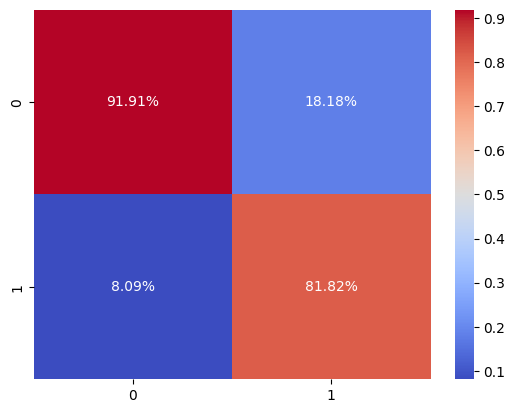

In [ ]:
%%time
parameters = {'C': np.linspace(0.00001, 0.2, 50)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

In [ ]:
S2_result = metrics

### **S2 (88% vs 12%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8455722489316239
CPU times: user 40.1 s, sys: 49.3 ms, total: 40.2 s
Wall time: 40.3 s


In [ ]:
np.linspace(300, 600, 5).astype(int)

array([300, 375, 450, 525, 600])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'n_estimators': 450}
ROC AUC: 0.8705103969754254
Accuracy: 0.875
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 15min 42s, sys: 1.27 s, total: 15min 44s
Wall time: 15min 51s


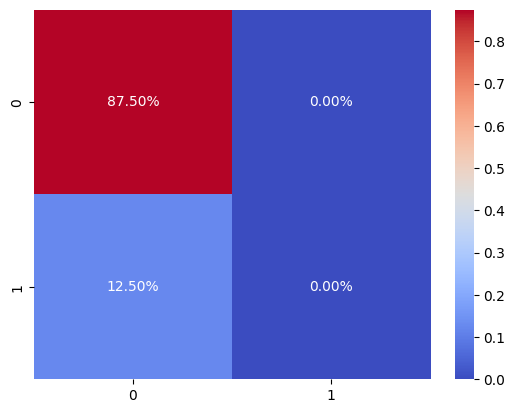

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 600, 5).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']

# Addestro il modello con il miglior parametro
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / (float(np.sum(cf_matrix[:,j])) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (88% vs 12%) 3. Naive Bayes**

Il modello Naive Bayes prende come input solo dati positivi, pertanto è necessario traslare i dati come segue.

In [ ]:
s = np.zeros(1)
X_bayes = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)
    temp = temp - np.min(temp)

    s = np.append(s, temp)

  X_bayes = np.vstack((X_bayes, s[1:]))
  s = np.zeros(1)


X_bayes = X_bayes[1:,:]
y_bayes = df.condition.to_numpy()

In [ ]:
print(X_bayes.shape, y_bayes.shape)

(1149, 2808) (1149,)


In [ ]:
# Suddivisione del dataset in set di training e test
X_bayes_train, X_bayes_test, y_bayes_train, y_bayes_test = train_test_split(X_bayes, y_bayes, test_size = 0.2, random_state = 42, stratify = y_bayes)

# Suddivisione del dataset in set di training e validazione
X_bayes_train_original, X_bayes_val, y_bayes_train_original, y_bayes_val = train_test_split(X_bayes_train, y_bayes_train, test_size = 0.2, random_state = 42, stratify = y_bayes_train)

In [ ]:
X_bayes_train = X_bayes_train_original
y_bayes_train = y_bayes_train_original

#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.810546875


Migliori parametri: {'alpha': 1.1119677311207024}
ROC AUC: 0.7682959762354847
Accuracy: 0.7880434782608695
F1-score: 0.360655737704918
Precision: 0.2894736842105263
Recall: 0.4782608695652174
CPU times: user 2min 22s, sys: 1min 9s, total: 3min 32s
Wall time: 2min 11s


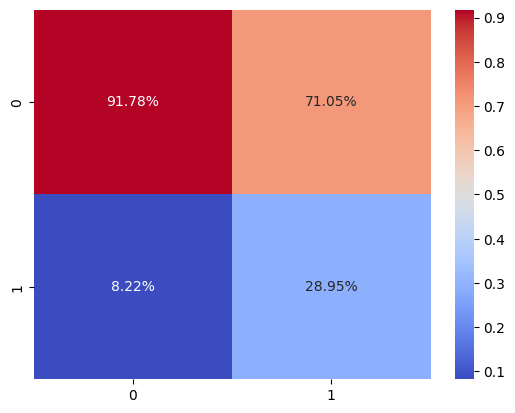

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.logspace(-8, 3, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha =  grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Complement NB*

In [ ]:
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8097262286324787


Migliori parametri: {'alpha': 3.759674965785475}
ROC AUC: 0.7682959762354847
Accuracy: 0.7771739130434783
F1-score: 0.3692307692307692
Precision: 0.2857142857142857
Recall: 0.5217391304347826
CPU times: user 2min 26s, sys: 1min 12s, total: 3min 38s
Wall time: 2min 11s


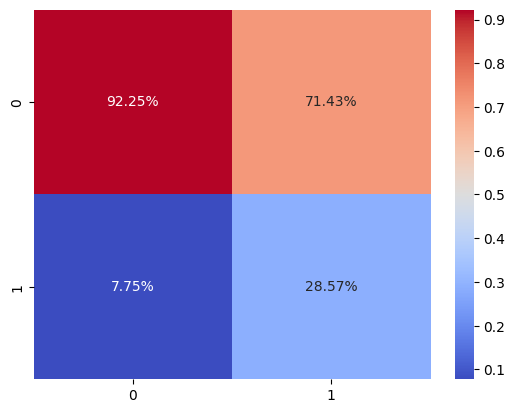

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 3, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (88% vs 12%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8699586004273504


In [ ]:
np.linspace(1e-4, 1, 10)

array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00])

Migliori parametri: {'C': 0.0024587755102040815}
ROC AUC: 0.9330272751822847
Accuracy: 0.9130434782608695
F1-score: 0.6521739130434783
Precision: 0.6521739130434783
Recall: 0.6521739130434783
CPU times: user 10min 29s, sys: 827 ms, total: 10min 29s
Wall time: 10min 31s


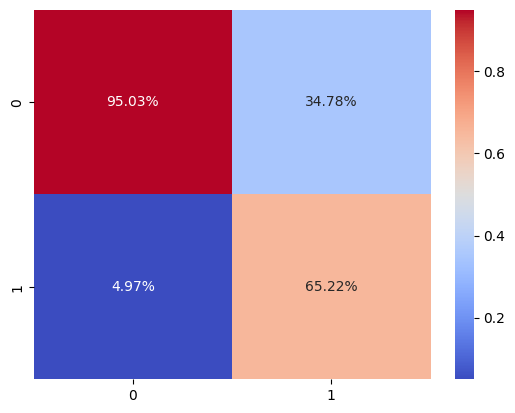

In [ ]:
%%time
parameters = {'C': np.linspace(1e-5, 0.12, 50)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Polinomiale*

In [ ]:
%%time
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8188955662393163
CPU times: user 33.2 s, sys: 56.3 ms, total: 33.2 s
Wall time: 33.4 s


In [ ]:
np.linspace(0.3, 3, 10)

array([0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 1.8000000000000003, 'degree': 3}
ROC AUC: 0.8827977315689981
Accuracy: 0.875
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 16min 22s, sys: 1.28 s, total: 16min 24s
Wall time: 16min 26s


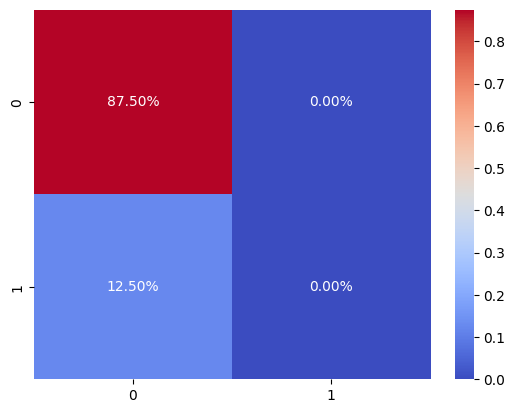

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.3, 3, 10)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])+ 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
%%time
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8858560363247863
CPU times: user 31.5 s, sys: 54.9 ms, total: 31.6 s
Wall time: 31.6 s


In [ ]:
np.linspace(1, 10, 20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

Migliori parametri: {'C': 3.1052631578947367}
ROC AUC: 0.9192546583850932
Accuracy: 0.8858695652173914
F1-score: 0.22222222222222218
Precision: 0.75
Recall: 0.13043478260869565
CPU times: user 11min 8s, sys: 849 ms, total: 11min 8s
Wall time: 11min 10s


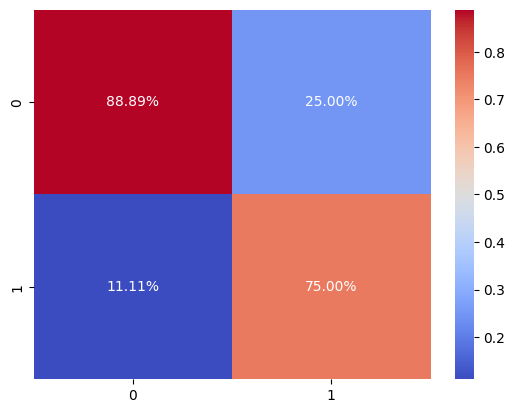

In [ ]:
%%time
parameters = {'C': np.linspace(2, 5, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (88% vs 12%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7926575854700855
CPU times: user 4min 15s, sys: 21.7 s, total: 4min 36s
Wall time: 2min 52s


In [ ]:
np.linspace(1e-8, 1, 10)
np.linspace(0.77, 1, 5)

array([0.77  , 0.8275, 0.885 , 0.9425, 1.    ])

Migliori parametri: {'shrinkage': 0.885}
ROC AUC: 0.941398865784499
Accuracy: 0.8804347826086957
F1-score: 0.5925925925925926
Precision: 0.5161290322580645
Recall: 0.6956521739130435
CPU times: user 20min 30s, sys: 1min 27s, total: 21min 57s
Wall time: 13min 2s


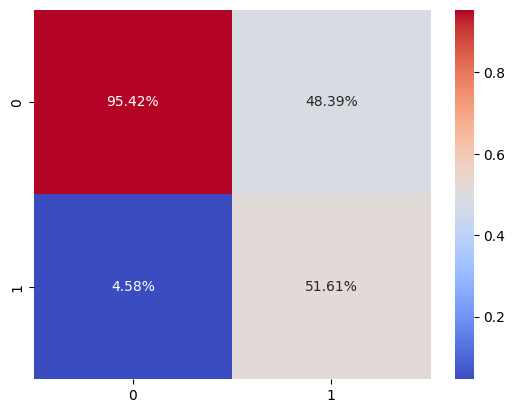

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.77, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

# Paziente S2 - dati unbalanced (70% vs 30%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  69.96805111821087 % e quella di T è 30.031948881789134 %. E in termini assoluti: Counter({0: 219, 1: 94})


## **Model selection**

### **S2 (70% vs 30%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8226262626262628


Cerco i migliori parameti con Grid search

In [ ]:
np.linspace(1e-5, 10, 100)

array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e+00, 1.41415e+00,
       1.51516e+00, 1.61617e+00, 1.71718e+00, 1.81819e+00, 1.91920e+00,
       2.02021e+00, 2.12122e+00, 2.22223e+00, 2.32324e+00, 2.42425e+00,
       2.52526e+00, 2.62627e+00, 2.72728e+00, 2.82829e+00, 2.92930e+00,
       3.03031e+00, 3.13132e+00, 3.23233e+00, 3.33334e+00, 3.43435e+00,
       3.53536e+00, 3.63637e+00, 3.73738e+00, 3.83839e+00, 3.93940e+00,
       4.04041e+00, 4.14142e+00, 4.24243e+00, 4.34344e+00, 4.44445e+00,
       4.54546e+00, 4.64647e+00, 4.74748e+00, 4.84849e+00, 4.94950e+00,
       5.05051e+00, 5.15152e+00, 5.25253e+00, 5.35354e+00, 5.45455e+00,
       5.55556e+00, 5.65657e+00, 5.75758e+00, 5.85859e+00, 5.95960e+00,
       6.06061e+00, 6.16162e+00, 6.26263e+00, 6.36364e+00, 6.46465e+00,
       6.56566e+00, 6.66667e+00, 6.76768e+00, 6.86869e+00, 6.969

Migliori parametri: {'C': 0.004091428571428571}
ROC AUC: 0.9160140426681069
Accuracy: 0.8913043478260869
F1-score: 0.5652173913043478
Precision: 0.5652173913043478
Recall: 0.5652173913043478
CPU times: user 1min 34s, sys: 36.2 s, total: 2min 11s
Wall time: 1min 17s


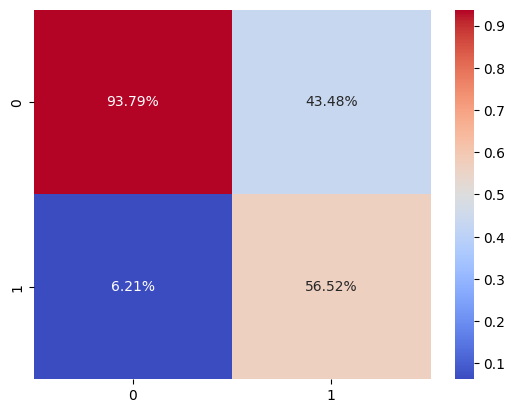

In [ ]:
%%time
parameters = {'C': np.linspace(1e-5, 0.2, 50)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S2_result = np.vstack((S2_result, metrics))

### **S2 (70% vs 30%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8427056277056277
CPU times: user 9.28 s, sys: 6.67 ms, total: 9.29 s
Wall time: 9.31 s


In [ ]:
np.linspace(700, 900, 5).astype(int)

array([700, 750, 800, 850, 900])

Migliori parametri: {'n_estimators': 800}
ROC AUC: 0.8923845530650825
Accuracy: 0.9021739130434783
F1-score: 0.4
Precision: 0.8571428571428571
Recall: 0.2608695652173913
CPU times: user 6min 50s, sys: 697 ms, total: 6min 51s
Wall time: 6min 54s


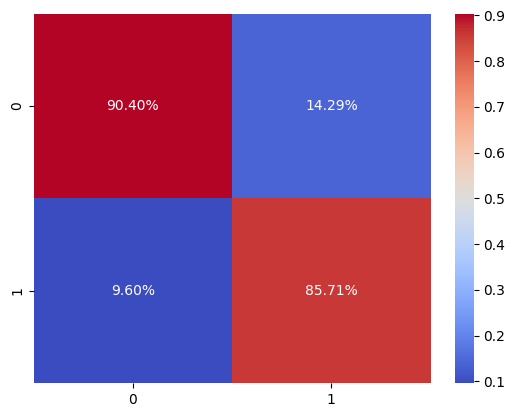

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(700, 900, 5).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (70% vs 30%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  69.96805111821087 % e quella di T è 30.031948881789134 %. E in termini assoluti: Counter({0: 219, 1: 94})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.7923304473304473
CPU times: user 198 ms, sys: 127 ms, total: 325 ms
Wall time: 253 ms


Migliori parametri: {'alpha': 1e-08}
ROC AUC: 0.7362948960302458
Accuracy: 0.7771739130434783
F1-score: 0.3692307692307692
Precision: 0.2857142857142857
Recall: 0.5217391304347826
CPU times: user 1min 11s, sys: 41 s, total: 1min 52s
Wall time: 1min 4s


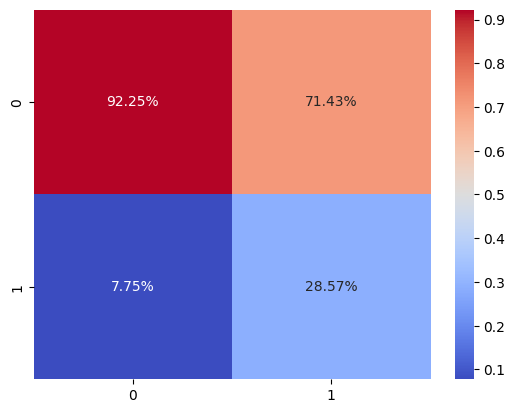

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.logspace(-8, 2, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

best_alpha_M = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB = MultinomialNB(alpha = best_alpha_M)
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.792077922077922
CPU times: user 170 ms, sys: 85.9 ms, total: 256 ms
Wall time: 138 ms


Migliori parametri: {'alpha': 1e-08}
ROC AUC: 0.7372400756143667
Accuracy: 0.7608695652173914
F1-score: 0.3529411764705882
Precision: 0.26666666666666666
Recall: 0.5217391304347826
CPU times: user 1min 11s, sys: 41.2 s, total: 1min 53s
Wall time: 1min 6s


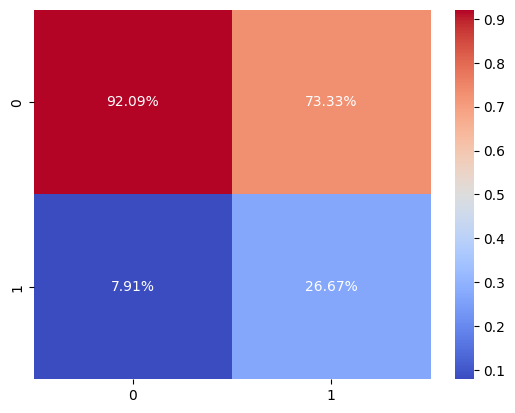

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 2, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (70% vs 30%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7992063492063491


In [ ]:
np.linspace(1e-5, 10, 100)

array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e+00, 1.41415e+00,
       1.51516e+00, 1.61617e+00, 1.71718e+00, 1.81819e+00, 1.91920e+00,
       2.02021e+00, 2.12122e+00, 2.22223e+00, 2.32324e+00, 2.42425e+00,
       2.52526e+00, 2.62627e+00, 2.72728e+00, 2.82829e+00, 2.92930e+00,
       3.03031e+00, 3.13132e+00, 3.23233e+00, 3.33334e+00, 3.43435e+00,
       3.53536e+00, 3.63637e+00, 3.73738e+00, 3.83839e+00, 3.93940e+00,
       4.04041e+00, 4.14142e+00, 4.24243e+00, 4.34344e+00, 4.44445e+00,
       4.54546e+00, 4.64647e+00, 4.74748e+00, 4.84849e+00, 4.94950e+00,
       5.05051e+00, 5.15152e+00, 5.25253e+00, 5.35354e+00, 5.45455e+00,
       5.55556e+00, 5.65657e+00, 5.75758e+00, 5.85859e+00, 5.95960e+00,
       6.06061e+00, 6.16162e+00, 6.26263e+00, 6.36364e+00, 6.46465e+00,
       6.56566e+00, 6.66667e+00, 6.76768e+00, 6.86869e+00, 6.969

Migliori parametri: {'C': 0.00203010101010101}
ROC AUC: 0.9373480961382663
Accuracy: 0.8532608695652174
F1-score: 0.5846153846153845
Precision: 0.4523809523809524
Recall: 0.8260869565217391
CPU times: user 6min 21s, sys: 316 ms, total: 6min 21s
Wall time: 6min 23s


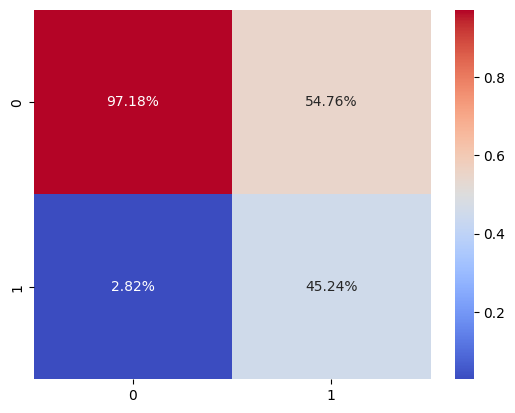

In [ ]:
%%time
parameters = {'C': np.linspace(1e-5, 0.2, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7668903318903318


In [ ]:
np.linspace(0.01, 5, 20)

array([0.01      , 0.27263158, 0.53526316, 0.79789474, 1.06052632,
       1.32315789, 1.58578947, 1.84842105, 2.11105263, 2.37368421,
       2.63631579, 2.89894737, 3.16157895, 3.42421053, 3.68684211,
       3.94947368, 4.21210526, 4.47473684, 4.73736842, 5.        ])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 1.4210526315789473, 'degree': 3}
ROC AUC: 0.8291925465838509
Accuracy: 0.875
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 4min 43s, sys: 260 ms, total: 4min 43s
Wall time: 4min 45s


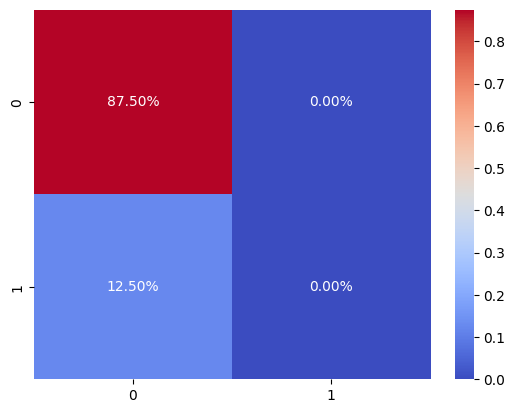

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(1, 2, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8492857142857142


In [ ]:
np.linspace(1, 10, 20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

Migliori parametri: {'C': 1.1583157894736842}
ROC AUC: 0.8823926546043748
Accuracy: 0.8858695652173914
F1-score: 0.5116279069767442
Precision: 0.55
Recall: 0.4782608695652174
CPU times: user 1min 55s, sys: 131 ms, total: 1min 55s
Wall time: 1min 56s


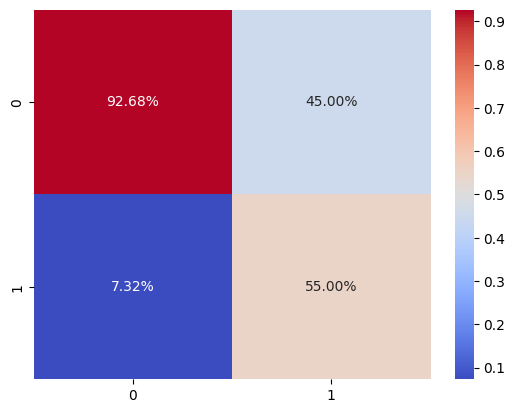

In [ ]:
%%time
parameters = {'C': np.linspace(1e-3, 2, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (70% vs 30%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.786111111111111
CPU times: user 4min 6s, sys: 19.4 s, total: 4min 26s
Wall time: 2min 39s


In [ ]:
np.linspace(0.5, 1, 5)

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [ ]:
np.linspace(1e-8, 1, 10)

array([1.0000000e-08, 1.1111112e-01, 2.2222223e-01, 3.3333334e-01,
       4.4444445e-01, 5.5555556e-01, 6.6666667e-01, 7.7777778e-01,
       8.8888889e-01, 1.0000000e+00])

Migliori parametri: {'shrinkage': 0.9425}
ROC AUC: 0.9033216311099109
Accuracy: 0.842391304347826
F1-score: 0.5538461538461539
Precision: 0.42857142857142855
Recall: 0.782608695652174
CPU times: user 19min 51s, sys: 1min 24s, total: 21min 16s
Wall time: 12min 35s


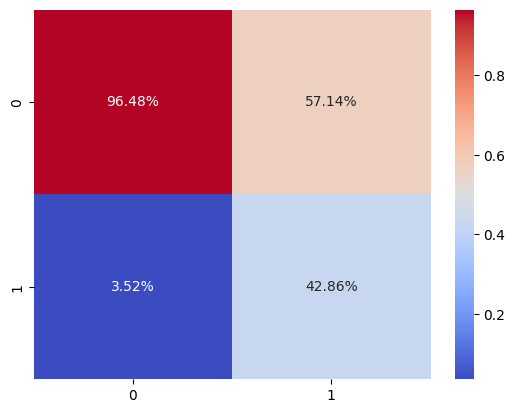

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.77, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

In [ ]:
S2_result.shape

(16, 5)

# Paziente S2 - dati unbalanced (60% vs 40%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  60.0 % e quella di T è 40.0 %. E in termini assoluti: Counter({0: 141, 1: 94})


## **Model selection**

### **S2 (60% vs 40%) 1. Logistic Regression**

In [ ]:
%%time
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8206349206349207
CPU times: user 1.73 s, sys: 833 ms, total: 2.57 s
Wall time: 1.89 s


Cerco i migliori parameti con Grid search

In [ ]:
np.linspace(1e-2, 10, 100)

array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.13818182,  3.23909091,  3.34      ,  3.44090909,
        3.54181818,  3.64272727,  3.74363636,  3.84454545,  3.94545455,
        4.04636364,  4.14727273,  4.24818182,  4.34909091,  4.45      ,
        4.55090909,  4.65181818,  4.75272727,  4.85363636,  4.95454545,
        5.05545455,  5.15636364,  5.25727273,  5.35818182,  5.45909091,
        5.56      ,  5.66090909,  5.76181818,  5.86272727,  5.96363636,
        6.06454545,  6.16545455,  6.26636364,  6.36727273,  6.46818182,
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97

Migliori parametri: {'C': 0.004138383838383839}
ROC AUC: 0.9189846070753444
Accuracy: 0.842391304347826
F1-score: 0.5245901639344263
Precision: 0.42105263157894735
Recall: 0.6956521739130435
CPU times: user 2min 21s, sys: 1min 1s, total: 3min 22s
Wall time: 1min 58s


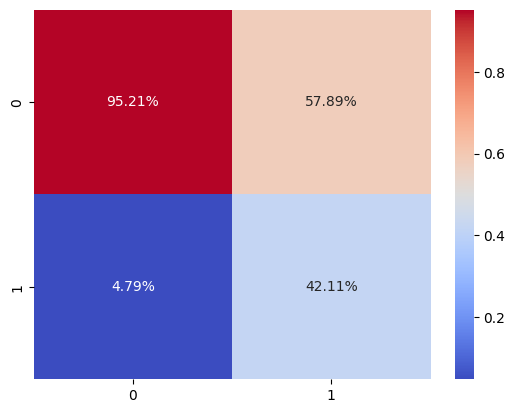

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 0.2, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S2_result = np.vstack((S2_result, metrics))

### **S2 (60% vs 40%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8160714285714287
CPU times: user 7.09 s, sys: 11.1 ms, total: 7.11 s
Wall time: 7.16 s


In [ ]:
np.linspace(950, 1300, 11).astype(int)

array([ 950,  985, 1020, 1055, 1090, 1125, 1160, 1195, 1230, 1265, 1300])

Migliori parametri: {'n_estimators': 1230}
ROC AUC: 0.9231704023764515
Accuracy: 0.9130434782608695
F1-score: 0.5789473684210527
Precision: 0.7333333333333333
Recall: 0.4782608695652174
CPU times: user 13min 59s, sys: 1.58 s, total: 14min 1s
Wall time: 14min 6s


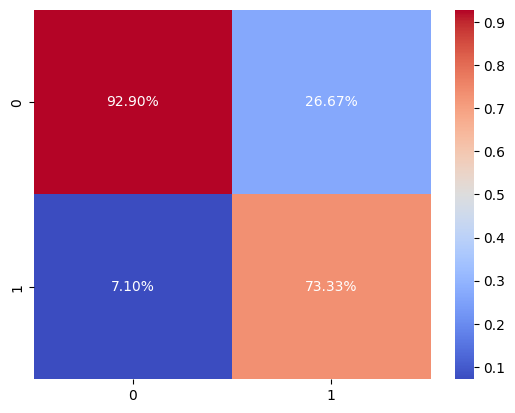

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(950, 1300, 11).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (60% vs 40%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  60.0 % e quella di T è 40.0 %. E in termini assoluti: Counter({0: 141, 1: 94})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.7728571428571429
CPU times: user 128 ms, sys: 40.6 ms, total: 169 ms
Wall time: 145 ms


Migliori parametri: {'alpha': 0.1615908753895919}
ROC AUC: 0.7442614096678369
Accuracy: 0.7119565217391305
F1-score: 0.3116883116883117
Precision: 0.2222222222222222
Recall: 0.5217391304347826
CPU times: user 1min 2s, sys: 35.7 s, total: 1min 38s
Wall time: 58.3 s


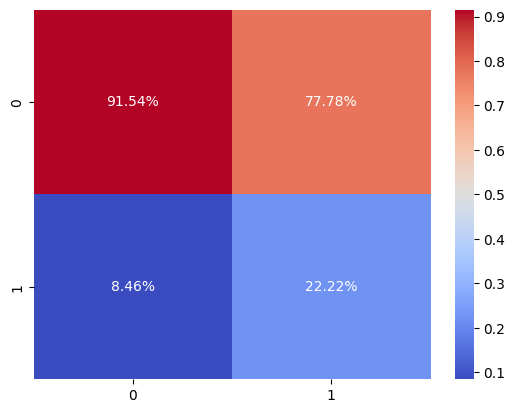

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.logspace(-8, 3, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.7716666666666667
CPU times: user 136 ms, sys: 57.9 ms, total: 194 ms
Wall time: 117 ms


Migliori parametri: {'alpha': 0.1615908753895919}
ROC AUC: 0.7461517688360789
Accuracy: 0.7119565217391305
F1-score: 0.3116883116883117
Precision: 0.2222222222222222
Recall: 0.5217391304347826
CPU times: user 1min 6s, sys: 37.8 s, total: 1min 44s
Wall time: 1min 1s


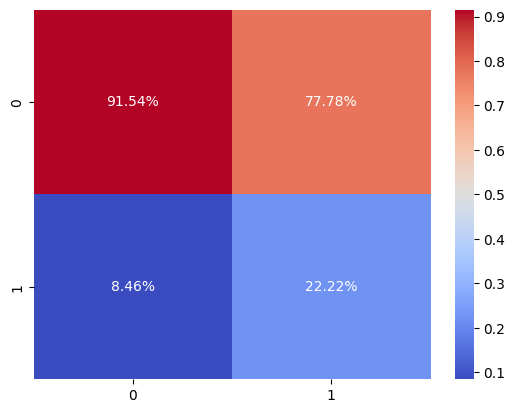

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 3, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (60% vs 40%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8097089947089946


In [ ]:
np.linspace(0.001, 0.02, 4)

array([0.001     , 0.00733333, 0.01366667, 0.02      ])

Migliori parametri: {'C': 0.00405020202020202}
ROC AUC: 0.9219551714825817
Accuracy: 0.8206521739130435
F1-score: 0.5352112676056338
Precision: 0.3958333333333333
Recall: 0.8260869565217391
CPU times: user 3min 58s, sys: 236 ms, total: 3min 58s
Wall time: 4min


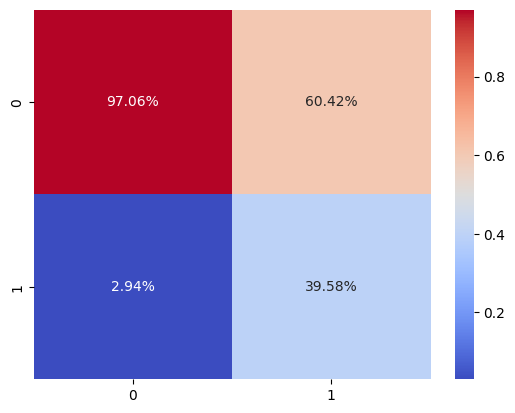

In [ ]:
%%time
parameters = {'C': np.linspace(1e-5, 0.2, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7343386243386243


In [ ]:
np.linspace(0.01, 5, 20)

array([0.01      , 0.27263158, 0.53526316, 0.79789474, 1.06052632,
       1.32315789, 1.58578947, 1.84842105, 2.11105263, 2.37368421,
       2.63631579, 2.89894737, 3.16157895, 3.42421053, 3.68684211,
       3.94947368, 4.21210526, 4.47473684, 4.73736842, 5.        ])

Migliori parametri: {'C': 1.5857894736842106, 'degree': 3}
ROC AUC: 0.8210910072913853
Accuracy: 0.875
F1-score: 0.08
Precision: 0.5
Recall: 0.043478260869565216
CPU times: user 2min 47s, sys: 177 ms, total: 2min 47s
Wall time: 2min 48s


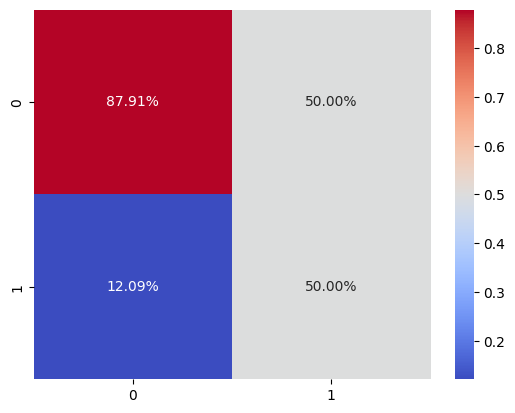

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:

svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.838994708994709


In [ ]:
np.linspace(1, 10, 20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

Migliori parametri: {'C': 1.2105263157894737}
ROC AUC: 0.8730758844180394
Accuracy: 0.8478260869565217
F1-score: 0.4814814814814815
Precision: 0.41935483870967744
Recall: 0.5652173913043478
CPU times: user 1min 7s, sys: 117 ms, total: 1min 8s
Wall time: 1min 8s


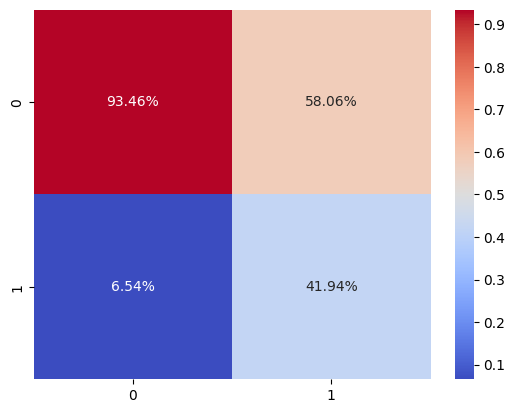

In [ ]:
%%time
parameters = {'C': np.linspace(1, 5, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (60% vs 40%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8030952380952382


In [ ]:
np.linspace(0.5, 1, 5)

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

Migliori parametri: {'shrinkage': 0.9425}
ROC AUC: 0.9091277342695112
Accuracy: 0.8315217391304348
F1-score: 0.537313432835821
Precision: 0.4090909090909091
Recall: 0.782608695652174
CPU times: user 20min 24s, sys: 1min 26s, total: 21min 50s
Wall time: 12min 54s


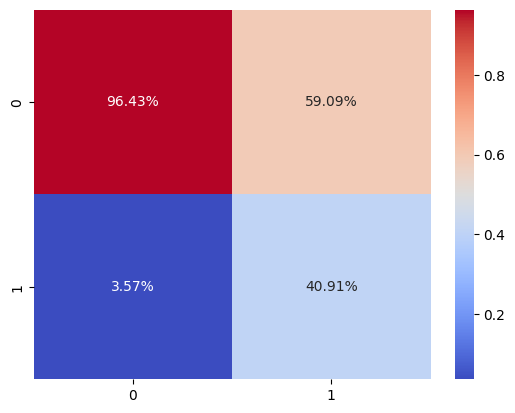

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.77, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

In [ ]:
S2_result.shape

(24, 5)

# Paziente S2 - dati unbalanced (50% vs 50%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 94, 1: 94})


## **Model selection**

### **S2 (50% vs 50%) 1. Logistic Regression**

In [ ]:
%%time

LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'f1')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8030237358101135
CPU times: user 1.64 s, sys: 704 ms, total: 2.34 s
Wall time: 1.36 s


Cerco i migliori parameti con Grid search

In [ ]:
np.linspace(0.001, 10, 100)

array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+00, 2.829e+00, 2.930e+00,
       3.031e+00, 3.132e+00, 3.233e+00, 3.334e+00, 3.435e+00, 3.536e+00,
       3.637e+00, 3.738e+00, 3.839e+00, 3.940e+00, 4.041e+00, 4.142e+00,
       4.243e+00, 4.344e+00, 4.445e+00, 4.546e+00, 4.647e+00, 4.748e+00,
       4.849e+00, 4.950e+00, 5.051e+00, 5.152e+00, 5.253e+00, 5.354e+00,
       5.455e+00, 5.556e+00, 5.657e+00, 5.758e+00, 5.859e+00, 5.960e+00,
       6.061e+00, 6.162e+00, 6.263e+00, 6.364e+00, 6.465e+00, 6.566e+00,
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 

Migliori parametri: {'C': 1.2424242424242424}
ROC AUC: 0.904941938968404
Accuracy: 0.7391304347826086
F1-score: 0.4545454545454545
Precision: 0.3076923076923077
Recall: 0.8695652173913043
CPU times: user 2min 15s, sys: 1min 7s, total: 3min 22s
Wall time: 2min 1s


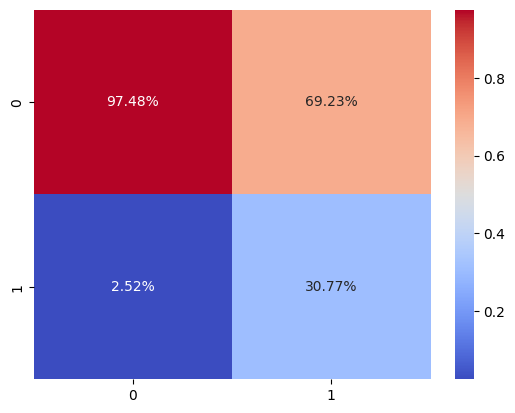

In [ ]:
%%time
parameters = {'C': np.linspace(1, 4, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S2_result = np.vstack((S2_result, metrics))

### **S2 (50% vs 50%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8508024691358024
CPU times: user 4.89 s, sys: 8.15 ms, total: 4.9 s
Wall time: 4.91 s


In [ ]:
np.linspace(200, 500, 16).astype(int)

array([200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440,
       460, 480, 500])

Migliori parametri: {'n_estimators': 220}
ROC AUC: 0.9222252227923305
Accuracy: 0.7989130434782609
F1-score: 0.5194805194805194
Precision: 0.37037037037037035
Recall: 0.8695652173913043
CPU times: user 4min 56s, sys: 707 ms, total: 4min 57s
Wall time: 4min 58s


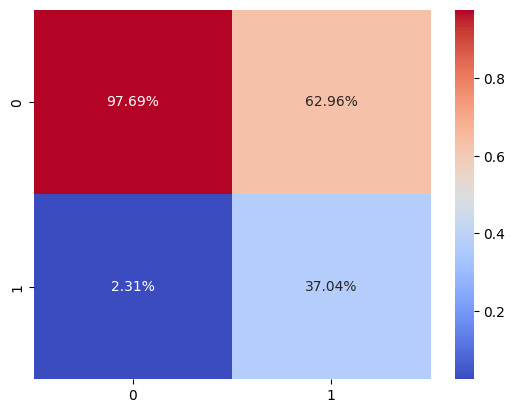

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(200, 500, 16).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (50% vs 50%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 94, 1: 94})


#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.7648765432098765


Migliori parametri: {'alpha': 222.17407810628848}
ROC AUC: 0.7345395625168782
Accuracy: 0.657608695652174
F1-score: 0.3368421052631579
Precision: 0.2222222222222222
Recall: 0.6956521739130435
CPU times: user 52.5 s, sys: 31.1 s, total: 1min 23s
Wall time: 47.7 s


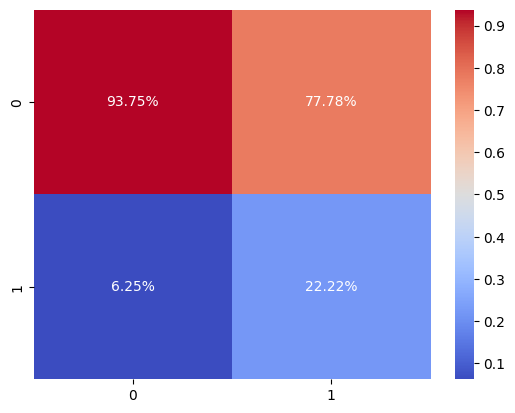

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.logspace(-1, 4, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.7648765432098765
CPU times: user 108 ms, sys: 56 ms, total: 164 ms
Wall time: 95.8 ms


Migliori parametri: {'alpha': 219.11966875781474}
ROC AUC: 0.7342695112071294
Accuracy: 0.657608695652174
F1-score: 0.3368421052631579
Precision: 0.2222222222222222
Recall: 0.6956521739130435
CPU times: user 53.4 s, sys: 32 s, total: 1min 25s
Wall time: 50.1 s


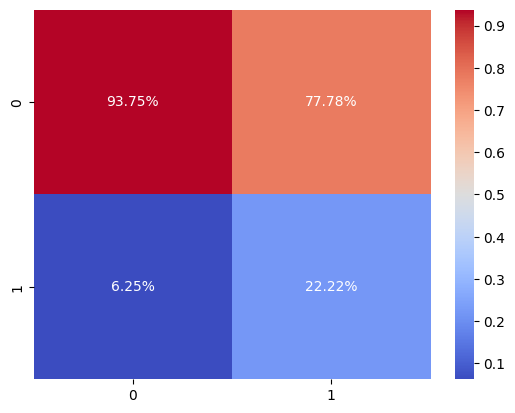

In [ ]:
%%time
parameters = {'alpha': np.logspace(-2, 4, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (50% vs 50%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8604938271604938


Migliori parametri: {'C': 0.010199999999999999}
ROC AUC: 0.8952200918174453
Accuracy: 0.717391304347826
F1-score: 0.4347826086956521
Precision: 0.2898550724637681
Recall: 0.8695652173913043
CPU times: user 2min 45s, sys: 178 ms, total: 2min 45s
Wall time: 2min 46s


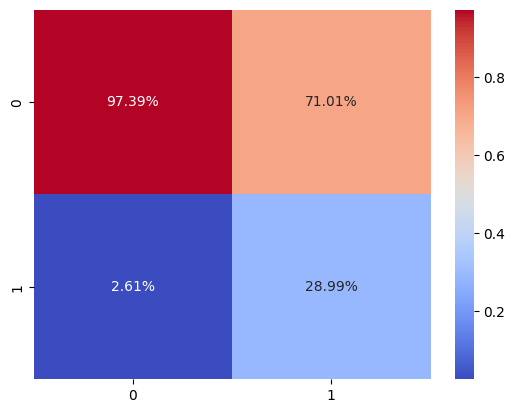

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 1, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.7235802469135801


Migliori parametri: {'C': 0.9542105263157896, 'degree': 3}
ROC AUC: 0.8534971644612477
Accuracy: 0.7065217391304348
F1-score: 0.425531914893617
Precision: 0.28169014084507044
Recall: 0.8695652173913043
CPU times: user 1min 47s, sys: 124 ms, total: 1min 47s
Wall time: 1min 48s


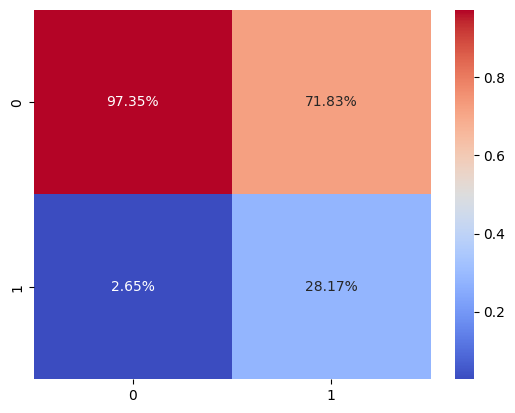

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 3, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8390123456790123


Migliori parametri: {'C': 2.052631578947368}
ROC AUC: 0.8998109640831757
Accuracy: 0.7663043478260869
F1-score: 0.4691358024691358
Precision: 0.3275862068965517
Recall: 0.8260869565217391
CPU times: user 43.3 s, sys: 77.5 ms, total: 43.4 s
Wall time: 43.6 s


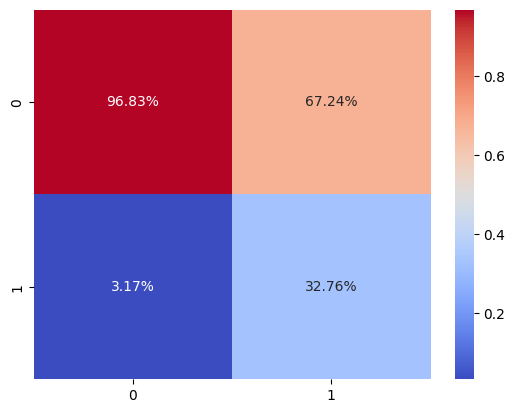

In [ ]:
%%time
parameters = {'C': np.linspace(1, 5, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

### **S2 (50% vs 50%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8585185185185186


In [ ]:
np.linspace(0.4, 1, 5)

array([0.4 , 0.55, 0.7 , 0.85, 1.  ])

Migliori parametri: {'shrinkage': 0.7500000025}
ROC AUC: 0.9197947610045909
Accuracy: 0.7717391304347826
F1-score: 0.5
Precision: 0.3442622950819672
Recall: 0.9130434782608695
CPU times: user 20min 23s, sys: 1min 24s, total: 21min 47s
Wall time: 12min 53s


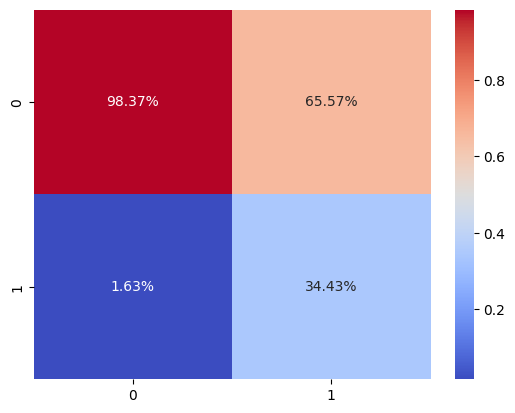

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S2_result = np.vstack((S2_result, metrics))

In [ ]:
S2_result.shape

# Salvataggio risultati per il paziente

In [ ]:
path_data = '/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results'
file_path = os.path.join(path_mount, path_data, subject)
np.save(file_path + "_results", S2_result)
print(file_path)

/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results/S2
